## 1.a

In [32]:
from numpy import sqrt, pi

#constants
gravity=9.81 #m/s**2
mass,dmass=0.0045, 0.0001  #kg
air_density=1.01 #kg/m^3
diameter,ddiameter=0.12, 0.01 #meters
C,dC=1.0,0.1 #drag coeffiecient
area= pi/4*diameter**2

y=2
v=0
dt=1e-3
t=0

while y>0:
    D=air_density/2*area*C*v**2/mass
    a=-gravity+D
    v+=a*dt
    y+=v*dt
    t+=dt
    
print(round(t,3))


0.915


## b

In [11]:
from numpy.random import randn
from numpy import sqrt, pi, mean, std

#constants
gravity=9.81 #m/s**2

dt=1e-4

results=[]

for i in range(1_000):
    
    #constants with uncertainties
    mass,dmass=0.000954, 0.000005  #kg
    diameter,ddiameter=0.155, 0.003 #meters
    rho,drho=1.01, 0.02 #kg/m^3
    C,dC=0.9,0.2 #drag coeffiecient
    y,dy=2.00, 0.01 
    
    v=0
    t=0

    r_area= pi/4*(diameter+ddiameter*randn())**2
    r_C=C+dC*randn()
    mass=mass+dmass*randn()
    r_y=y+dy*randn()
    r_rho=rho + drho*randn()
    
    
    while y>0:  
        D=r_rho/2*r_area*r_C*v**2
        a=-gravity+D/mass
        v+=a*dt
        y+=v*dt
        t+=dt
        #if a <= 1e-3 or a >= -1e-3:
        #    print(f"Trucated Cone reached Terminal velocity at {y:.2f}")
        #else:
        #    continue
    results.append(t)
    
print(f"Time to fall: {mean(results):.2f} s")
print(f"+- {std(results):.2f} s")


Time to fall: 1.98 s
+- 0.22 s


## c

If analyze the equations, because the diameter is a squared term, the uncertainty in it contributes the most out of the other terms, which are all to the first power.

## 2.a

$$ \Large{a = R \alpha }$$

$$\Large{ F = -mg sin \theta }$$

$$\Large{ F_{net} = ma}$$

$$\Large{-mg sin \theta = m (R \alpha)}$$

$$\Large{\alpha = -(g/R) sin \theta }$$

## b

In [11]:
from numpy import sin, sqrt, pi, mean, std
from numpy.random import randn
import sympy as sym


T=[]
g=9.81
dt=1e-4

for n in range(100):
    g=9.81
    r,dr=0.0205,0.0005
    m,dm=0.0347,0.0002
    R,dR=0.85,0.003
    theta,dtheta=90/180*pi,1/180*pi
    omega=0
    t=0
    
    r=r+dr*randn()
    m=m+dm*randn()
    R=R+dR*randn()
    theta=theta+dtheta*randn()
    
    while theta>0:
        alpha= -(g/R)*sin(theta)
        omega += alpha*dt
        theta += omega*dt
        t+=dt
    T.append(t)
    
print(f"Period of pendulum w/out using the small angle approximation: {4*mean(T):.3f} +- {4*std(T):.3f} s")

L=sym.symbols("L")

period=2*pi*sym.sqrt(L/g)

dT_dR=sym.diff(period,L)

L,dL=0.85,0.003

sub={'L':L}

time=period.subs(sub).evalf(6)

d_time=float(dT_dR.subs(sub).evalf(6))*dR

print(f"Period of pendulum using the small angle approximation: {time:.3f} +- {d_time:.3f} s")


Period of pendulum w/out using the small angle approximation: 2.184 +- 0.010 s
Period of pendulum using the small angle approximation: 1.850 +- 0.003 s


## c

In [6]:
from numpy import sin, sqrt, pi, mean, std
from numpy.random import randn
import sympy as sym


T=[]
g=9.81
dt=1e-4

for n in range(1_000):
    g=9.81
    r,dr=0.0205,0.0005
    m,dm=0.0347,0.0002
    R,dR=0.85,0.003
    theta,dtheta=90/180*pi,1/180*pi
    rho,drho=1.01, 0.02 #kg/m^3
    C,dC=0.5,0.1 #drag coeffiecient
    omega=0
    t=0

    r=r+dr*randn()
    m=m+dm*randn()
    R=R+dR*randn()
    rho=rho+drho*randn()
    theta=theta+dtheta*randn()
    
    while theta>0:
        D=rho/2*(pi*r**2)*C*(R*omega)**2
        alpha= -(g/R)*sin(theta)+D/m/r
        omega += alpha*dt
        theta += omega*dt
        t+=dt
    T.append(t)
    
print(f"Period of pendulum w/out using the small angle approximation: {4*mean(T):.2f} +- {4*std(T):.2f} s")


Period of pendulum w/out using the small angle approximation: 2.42 +- 0.02 s


## 3

In [6]:
from numpy import sin, sqrt, pi, mean, std
from numpy.random import randn

T=[]
g=9.81
dt=1e-4

for n in range(1_000):
    g=9.81
    R,dR=0.275,0.005
    theta,dtheta=45/180*pi,1/180*pi
    omega=0
    t=0
    
    R=R+dR*randn()
    rho=rho+drho*randn()
    theta=theta+dtheta*randn()
    
    while theta>0:
        # Air drag calculation, but we weren't given mass
        #D=rho/2*(pi*r**2)*C*(R*omega)**2
        alpha= -(g/R)*sin(theta)*5/7 #-D/r/m if we want to include air drag
        omega += alpha*dt
        theta += omega*dt
        t+=dt
    T.append(t)
    
print(f"Time is take for ball to roll down ramp: {mean(T):.3f} +- {std(T):.3f} s")


Time is take for ball to roll down ramp: 0.323 +- 0.003 s


## 4.a

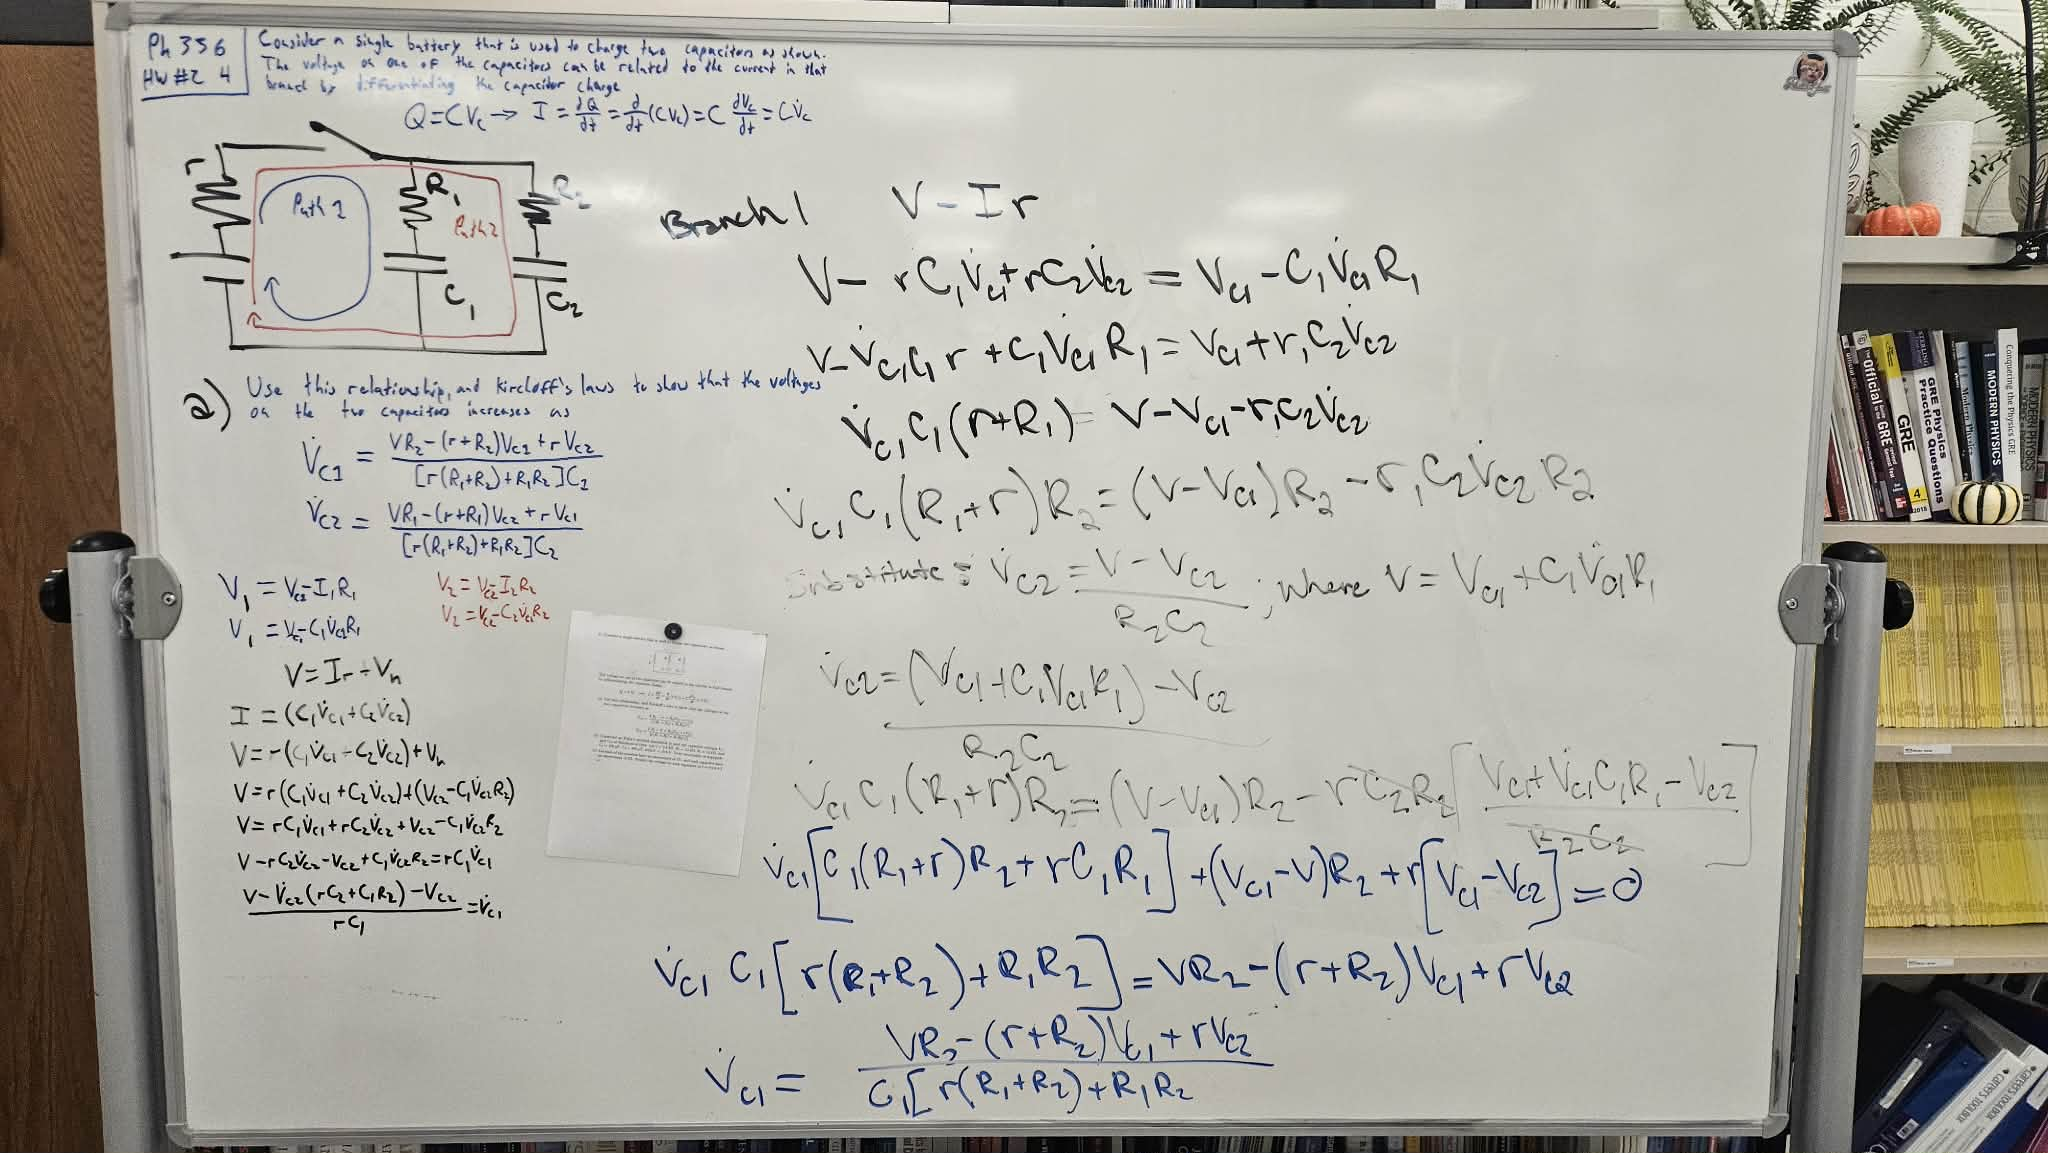

## b.

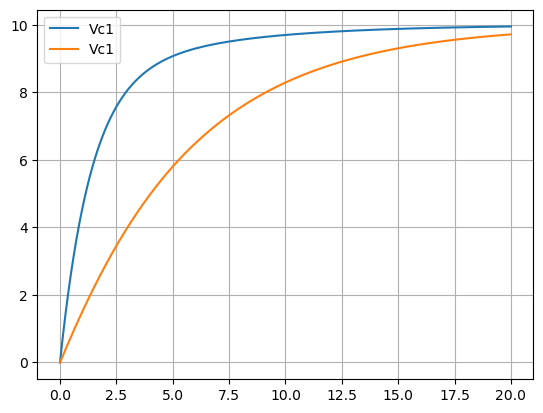

In [10]:
from matplotlib import pyplot as plt
from numpy import exp

r,R1,R2=1800,12000,12000
dr,dR1,dR2=r*0.01,R1*0.01,R2*0.01
C1,C2=1e-4,4e-4
dC1,dC2=C1*0.05,C2*0.05
V=10.0

T=[0]
V1=[0]
V2=[0]
dt=1e-3
tf=20

while T[-1]<tf:
    V1_dt=(V*R2-(r+R2)*V1[-1]+r*V2[-1])/(C1*(r*(R1+R2)+R1*R2))
    V2_dt=(V*R1-(r+R1)*V2[-1]+r*V1[-1])/(C2*(r*(R1+R2)+R1*R2))
    V1.append(V1[-1]+V1_dt*dt)
    V2.append(V2[-1]+V2_dt*dt)
    T.append(T[-1]+dt)

plt.plot(T,V1, label="Vc1")
plt.plot(T,V2, label="Vc1")
plt.legend()
plt.grid()
plt.show()    

## c.

In [24]:
from matplotlib import pyplot as plt
from numpy.random import randn
from numpy import mean, std

Vc1=[]
Vc2=[]

for n in range(1000):
    r,R1,R2=1800,12000,12000
    dr,dR1,dR2=r*0.01,R1*0.01,R2*0.01
    C1,C2=1e-4,4e-4
    dC1,dC2=C1*0.05,C2*0.05
    V=10.0
    
    T=[0]
    V1=[0]
    V2=[0]
    dt=0.001
    tf,dtf=5,0.2
    
    tf=tf+dtf*randn()
    r=r+dr*randn()
    R1=R1+dR1*randn()
    R2=R2+dR2*randn()
    C1=C1+dC1*randn()
    C2=C2+dC2*randn()
    
    while T[-1]<tf:
        V1_dt=(V*R2-(r+R2)*V1[-1]+r*V2[-1])/(C1*(r*(R1+R2)+R1*R2))
        V2_dt=(V*R1-(r+R1)*V2[-1]+r*V1[-1])/(C2*(r*(R1+R2)+R1*R2))
        V1.append(V1[-1]+V1_dt*dt)
        V2.append(V2[-1]+V2_dt*dt)
        T.append(T[-1]+dt)
    
    Vc1.append(V1[-1])
    Vc2.append(V2[-1])
    

print(f"Voltage on Capacitor 1 at t = 5.0 s : {mean(Vc1):.2f} += {std(Vc1):.2f} volts.")
print(f"Voltage on Capacitor 2 at t = 5.0 s : {mean(Vc2):.1f} += {std(Vc2):.1f} volts.")


Voltage on Capacitor 1 at t = 5.0 s : 9.07 += 0.08 volts.
Voltage on Capacitor 2 at t = 5.0 s : 5.8 += 0.2 volts.
